# Quick Stats Review 
--goal here is just to brush over statistical concepts.. not focusing on data preparation

In [ ]:
#database
import sqlite3

#structures and linalg
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

#stats
import statsmodels.api as sm
import scipy

#other
import sys
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#dont need api stuff
sys.path.insert(1, '/Users/verbeck/Desktop/Finance/Technology/Project/Setup/Resources')
from generalHelpers import getAllTables

## Table of Contents

[L1](#L1), [L2](#L2), [L3](#L3)

In [529]:
#retrieve all tables for use
all_tables = getAllTables('../../FinancesSp500.db')

KeyboardInterrupt: 

<a id='L1'></a> 
## L 1.1

In [352]:
#check out profiles table for 
profiles_all = all_tables.get('CV_PROFILE')

In [353]:
#extract types without making copies
mutual_funds = profiles_all[profiles_all.exchangeShortName=='MUTUAL_FUND']
securities_index = set(profiles_all.index)-set(mutual_funds.index)
stocks = profiles_all.loc[securities_index][profiles_all.loc[securities_index].isEtf==False]
etfs = profiles_all.loc[securities_index][profiles_all.loc[securities_index].isEtf==True]

In [354]:
#check out a couple categories
print('---Mutual Funds---')
mutual_funds.info(verbose=False)
print('\n---Stocks---')
stocks.info(verbose=False)
print('\n---ETFs---')
etfs.info(verbose=False)

---Mutual Funds---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 539 to 614
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(8), int64(4), object(22)
memory usage: 17.2+ KB

---Stocks---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 1 to 617
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(8), int64(4), object(22)
memory usage: 137.8+ KB

---ETFs---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 619
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(8), int64(4), object(22)
memory usage: 14.5+ KB


In [355]:
#checkout stocks further
display(stocks.describe()) #check out some distributions

,price,beta,volAvg,mktCap,lastDiv,changes,cik,dcfDiff,dcf,defaultImage,isEtf,isActivelyTrading
count,504.00,504.00,503.00,504.00,504.00,504.00,502.00,318.00,499.00,504.00,504.00,504.00
mean,171.97,1.09,4916002.83,69681292459.01,1.85,-0.19,776824.26,229.40,4533.01,0.01,0.00,1.00
std,318.43,0.55,9746993.60,175460300512.84,2.42,4.74,548388.95,1868.91,96312.25,0.12,0.00,0.00
min,0.00,-0.06,22275.00,0.00,0.00,-17.77,1800.00,-10214.30,-288.71,0.00,0.00,1.00
25%,53.57,0.72,1079136.50,15627183600.00,0.38,-1.55,97009.75,-60.68,48.43,0.00,0.00,1.00
50%,100.07,1.06,2104201.00,27071216600.00,1.31,-0.60,877551.00,-17.22,98.07,0.00,0.00,1.00
75%,179.61,1.39,4602538.00,56805661750.00,2.54,0.34,1133310.50,68.02,177.04,0.00,0.00,1.00
max,4500.84,4.82,107597034.00,2035725110000.00,32.50,55.31,1792044.00,24768.70,2151560.00,1.00,0.00,1.00


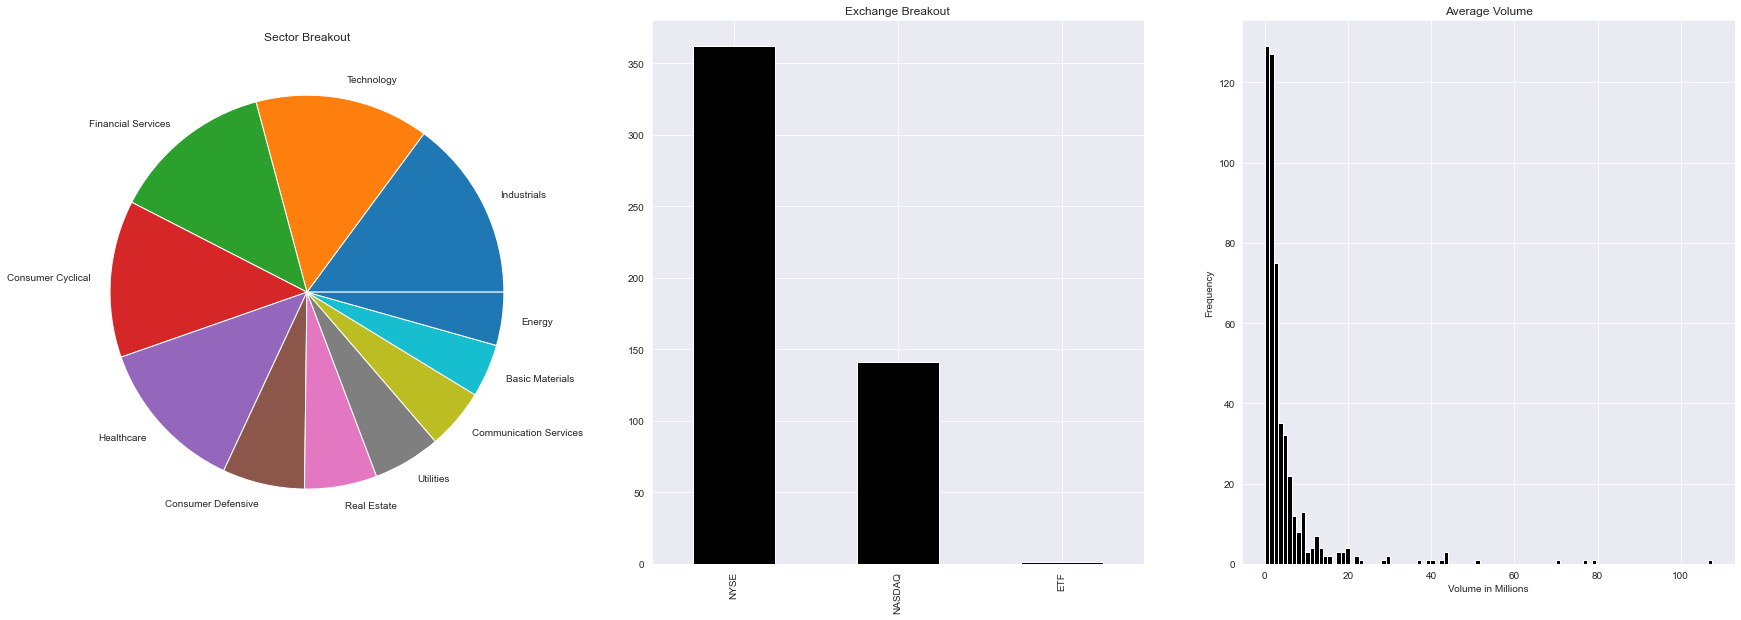

In [356]:
# little bit of eda
fig, axes = plt.subplots(1,3,figsize=(30,10))
ax1 = stocks.sector.value_counts().plot(kind='pie',ax= axes[0])
ax1.set_title('Sector Breakout')
ax1.set_ylabel('')
ax2 = stocks.exchangeShortName.value_counts().plot(kind='bar',ax= axes[1],color='black')
ax2.set_title('Exchange Breakout')
ax3 = (stocks.volAvg/1000000).plot(kind='hist',ax= axes[2],color='black',bins=100)
ax3.set_title('Average Volume')
ax3.set_xlabel('Volume in Millions')
ax3.ticklabel_format(useOffset=False, style='plain')
plt.show()

quick notes- volume positively skewed

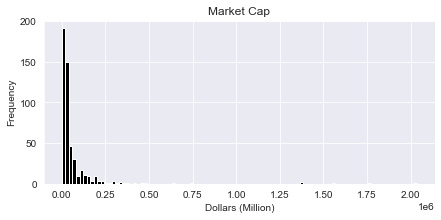

In [357]:
#further look at marketcap
plt.subplots(1,1,figsize=(7,3))
(stocks.mktCap/1000000).plot(kind = 'hist',bins = 100,color='black')
plt.title('Market Cap')
plt.xlabel('Dollars (Million)')
plt.show();

quick notes - marketcap positive skew as as well

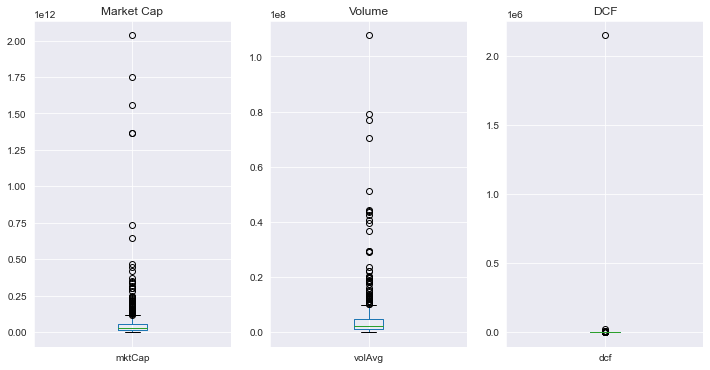

In [358]:
fig, axes = plt.subplots(1,3,figsize=(12,6))
ax1 = stocks.mktCap.plot(kind='box',ax=axes[0])
ax1.set_title('Market Cap')

ax1 = stocks.volAvg.plot(kind='box',ax=axes[1])
ax1.set_title('Volume')

ax1 = stocks.dcf.plot(kind='box',ax=axes[2])
ax1.set_title('DCF')
plt.show();

quick notes - huge outlier for stock DCF. would be interesting to see who that is...

In [359]:
display(stocks.dcf.describe())
print()
display(stocks[stocks.dcf == stocks.dcf.max()])
##Host hotels apparently!

count       499.00
mean       4533.01
std       96312.25
min        -288.71
25%          48.43
50%          98.07
75%         177.04
max     2151560.00
Name: dcf, dtype: float64

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,...,city,state,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading
299,HST,16.59,1.22,8173086.00,11702586400,0.20,7.86-17.43,0.23,Host Hotels & Resorts Inc,USD,...,Bethesda,MARYLAND,20817,7.69,2151560.00,https://financialmodelingprep.com/image-stock/...,1998-12-29,0,0,1


quick notes - column median indicates there is something wrong with this value.

## L 1.2

In [478]:
#create usable range columns, look @ range
lower = stocks.range.apply(lambda x: np.nan if x == 'null-null' else float(x.split('-')[0]))
upper = stocks.range.apply(lambda x: np.nan if x == 'null-null' else float(x.split('-')[1]))

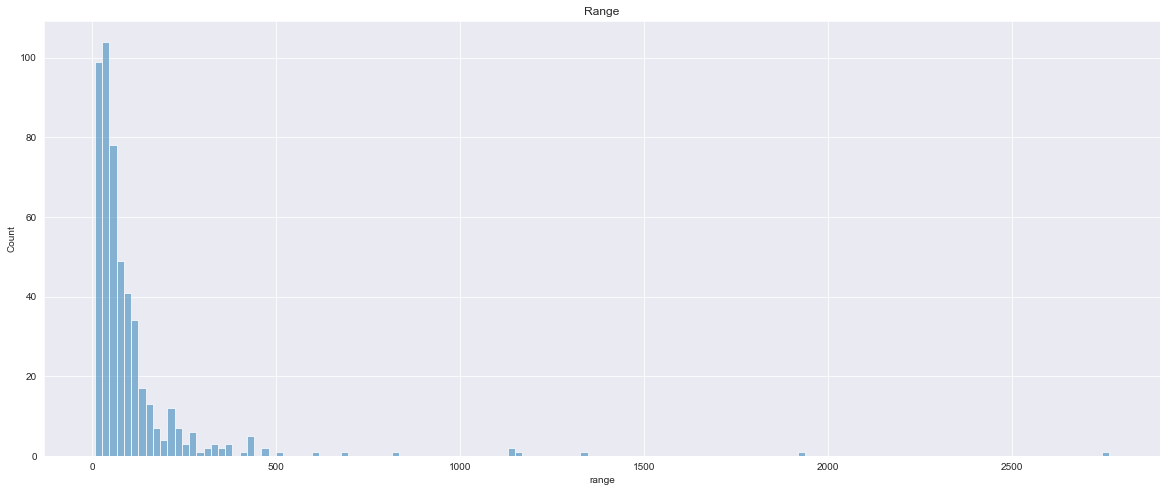

In [485]:
fig, axes = plt.subplots(1,1,figsize=(20,8))
a1 = sns.histplot(upper-lower,ax=axes,palette='Paired',alpha=.5)
plt.title('')
plt.show()

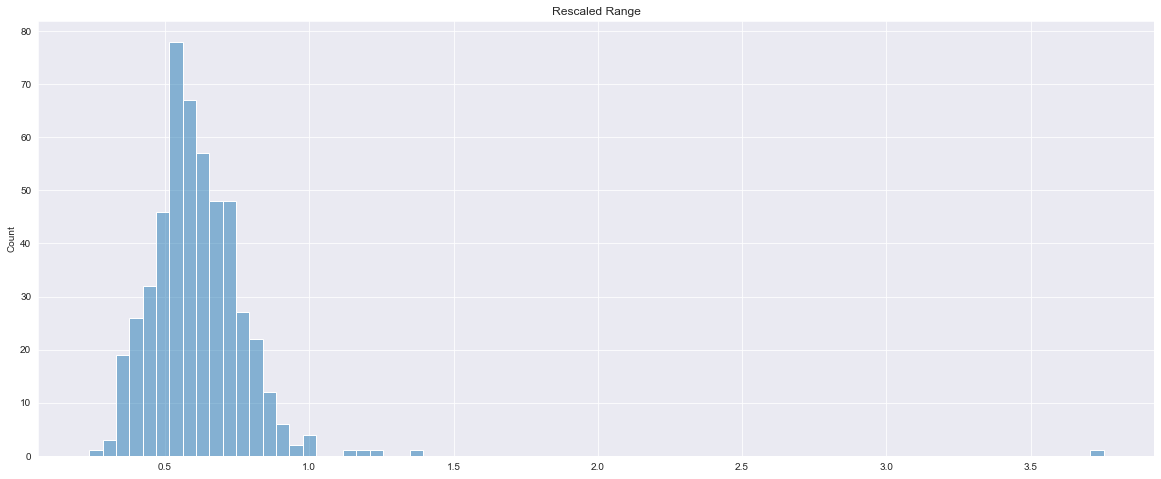

In [525]:
#not in review, but interesting to think about
#rescale to normalize column
fig, axes = plt.subplots(1,1,figsize=(20,8))
scaled = (upper-lower) / stocks.price ##scale by current stock price – shows scaled range for comparison
a1 = sns.histplot(scaled,ax=axes,palette='Paired',alpha=.5)
plt.title('Rescaled Range')
plt.show()

quick notes - notice most companies' range is smalleer than their total stock price, but some are multiples! Good outliers to check


## L 1.3

In [526]:
#quick one sample 2 tail t test against mean of 0
result = scipy.stats.ttest_1samp(lower,0,nan_policy='omit')
result

Ttest_1sampResult(statistic=12.73151732156874, pvalue=2.2511057497041488e-32)

In [527]:
#two sample t test
#equals
result = scipy.stats.ttest_ind(stocks.volAvg,etfs.volAvg,nan_policy='omit')
print(result)

#less than.. 
#result = scipy.stats.ttest_ind(stocks.volAvg,etfs.volAvg,nan_policy='omit',alternative = 'less')
##above throws error due to nans, therefore...
result = scipy.stats.ttest_ind(stocks[stocks.volAvg.notnull()].volAvg,etfs[etfs.volAvg.notnull()].volAvg,alternative='less')
print(result)

Ttest_indResult(statistic=-7.457456896404115, pvalue=3.4238893530203724e-13)
Ttest_indResult(statistic=-7.457456896404115, pvalue=1.7119446765104616e-13)


quick notes – above shows test of sample means, stocks vs etfs.. Shows etfs have higher average vol on av for second test, u1 != u2 for first test

<a id="L2"></a>
## L 2.1

In [691]:
stocks2 = stocks.drop(index=stocks[stocks.dcf >= 500].index)
stocks2 = stocks2[stocks2.state.isin(['CALIFORNIA','TEXAS'])]

/Users/verbeck/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


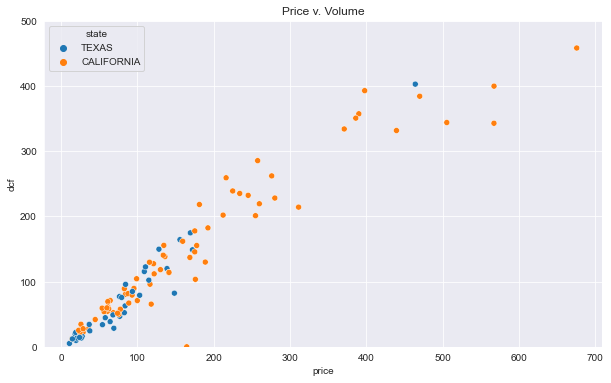

In [692]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(stocks2.price,stocks2.dcf,ax=axes,hue=stocks2.state)
plt.title('Price v. Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim([0,500])
plt.show();

In [693]:
scipy.stats.ttest_ind(stocks2[stocks2.state=='CALIFORNIA'].dcf,stocks2[stocks2.state=='TEXAS'].dcf,alternative='greater')

Ttest_indResult(statistic=3.8549532561913313, pvalue=9.939989114994294e-05)